In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from analysis import download_database
download_database()

Connection successfully established ... 
File successfully downloaded ...


In [2]:
from analysis import DataBase
data = DataBase('equipsy.ABETdb')
group_experiments = data.get_group_experiments()

-- ----------------------------------------------------------
-- MDB Tools - A library for reading MS Access database files
-- Copyright (C) 2000-2011 Brian Bruns and others.
-- Files in libmdb are licensed under LGPL and the utilities under
-- the GPL, see COPYING.LIB and COPYING files respectively.
-- Check out http://mdbtools.sourceforge.net
-- ----------------------------------------------------------

-- That file uses encoding UTF-8

CREATE TABLE `tbl_Schedules`
 (
	`SID`			int not null auto_increment unique, 
	`SName`			varchar (100), 
	`SEnviro`			varchar (50), 
	`SMachineName`			varchar (30), 
	`SVersion`			varchar (10), 
	`SRunDate`			datetime, 
	`SFinal`			boolean NOT NULL, 
	`ZE_GUID`			varchar (50), 
	`ZS_GUID`			varchar (50), 
	`SRecCount`			int
);

-- CREATE INDEXES ...
ALTER TABLE `tbl_Schedules` ADD PRIMARY KEY (`SID`);

CREATE TABLE `tbl_Schedule_Notes`
 (
	`SID`			int, 
	`NName`			varchar (100), 
	`NValue`			text
);

-- CREATE INDEXES ...

CREATE TABLE `tbl_Data`
 (


No MSysRelationships


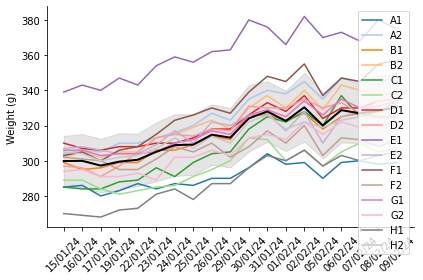

In [3]:
from plotting import *
display_weights(group_experiments, output='weights.png')

['Reward_First', 'Screen_Centre', 'Screen_First', 'Screen_beam', 'Screen_left', 'Screen_right', 'reward_beam', 'reward_to_screen', 'screen_to_reward']
['Correct_Counter']
['Correct_Counter']
['Correct_Counter', 'Blank_Touch_Counter', 'Correct_Percentage']
['Correct_Counter', 'Blank_Touch_Counter', 'Correct_Percentage']
['Correct_Counter', 'Blank_Touch_Counter', 'Correct_Percentage']
['Correct_Counter', 'Blank_Touch_Counter', 'Correct_Percentage']


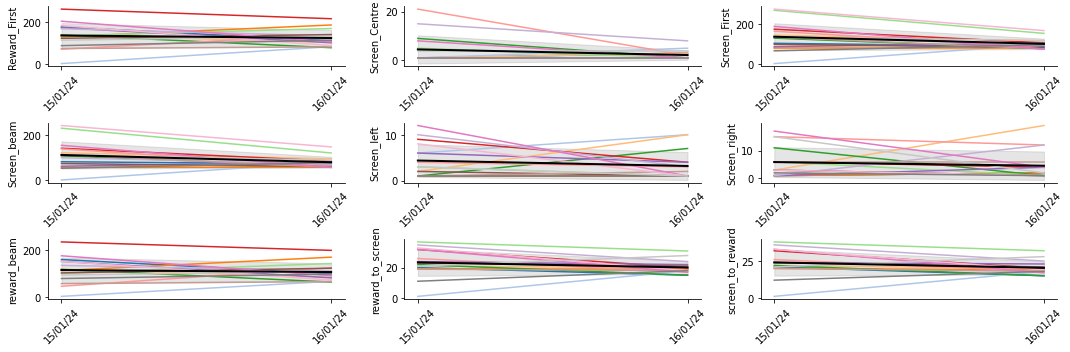

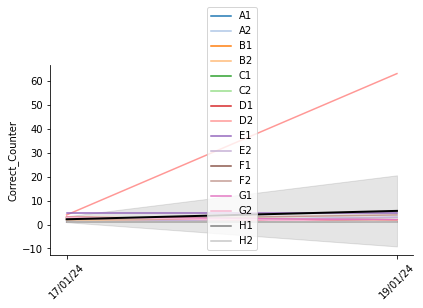

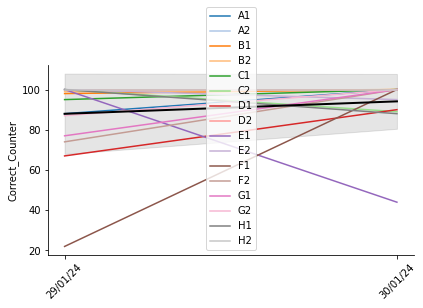

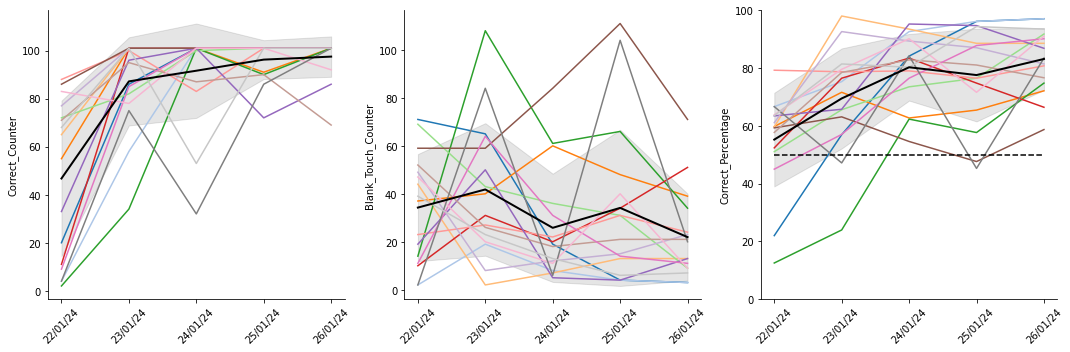

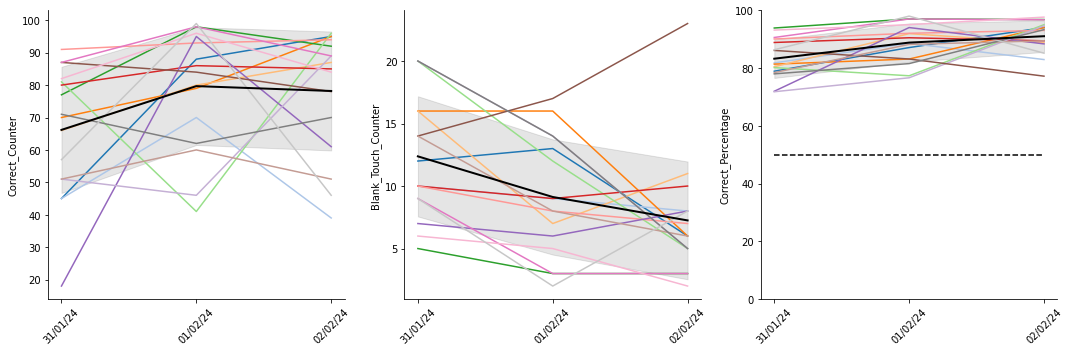

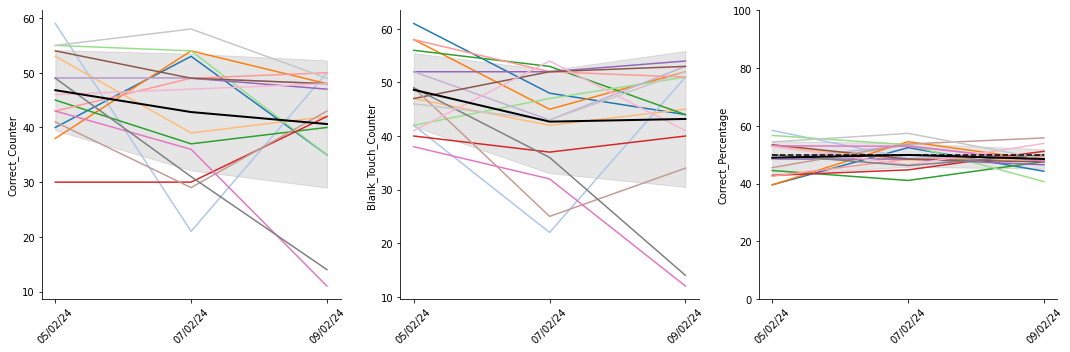

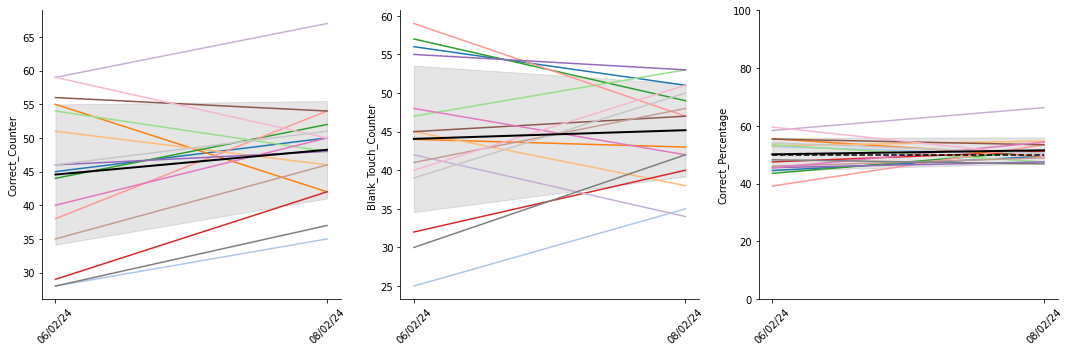

In [26]:
from plotting import *
for type in group_experiments.all_types:
    a = group_experiments.get_experiments_per_types(type)
    display_variables(a, output=f'{type}.png')

R-squared: 0.051285


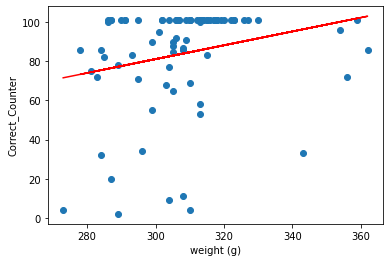

In [27]:
# Get initial weights

for type in ['Must Touch']:
    a = group_experiments.get_experiments_per_types(type)
    all_weights = []
    all_perfs = []
    for e in a.experiments:
        all_weights += [e.weight]
        all_perfs += [e.stats['Correct_Counter']]
all_weights = np.array(all_weights)
all_perfs = np.array(all_perfs)
#plt.plot(all_weights, all_perfs, '.')

plt.xlabel('weight (g)')
plt.ylabel('Correct_Counter')
from scipy import stats
res = stats.linregress(all_weights, all_perfs)
plt.plot(all_weights, all_perfs, 'o', label='original data')
plt.plot(all_weights, res.intercept + res.slope*all_weights, 'r', label='fitted line')
print(f"R-squared: {res.rvalue**2:.6f}")

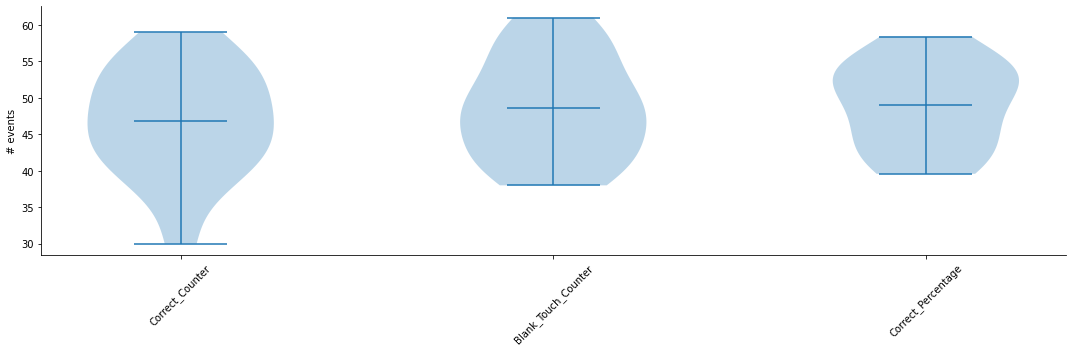

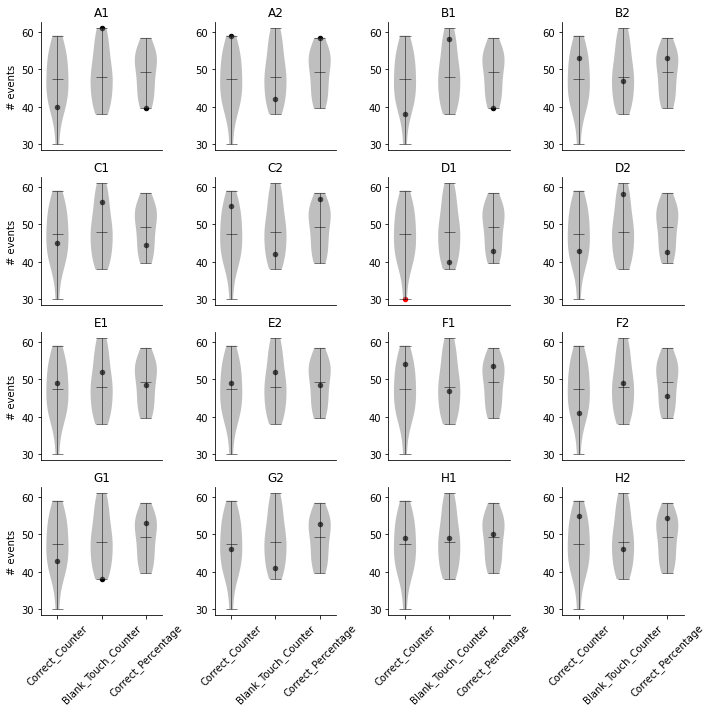

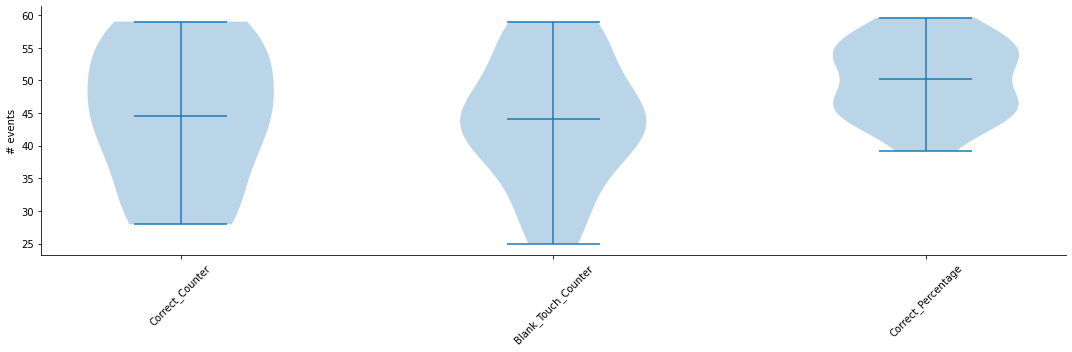

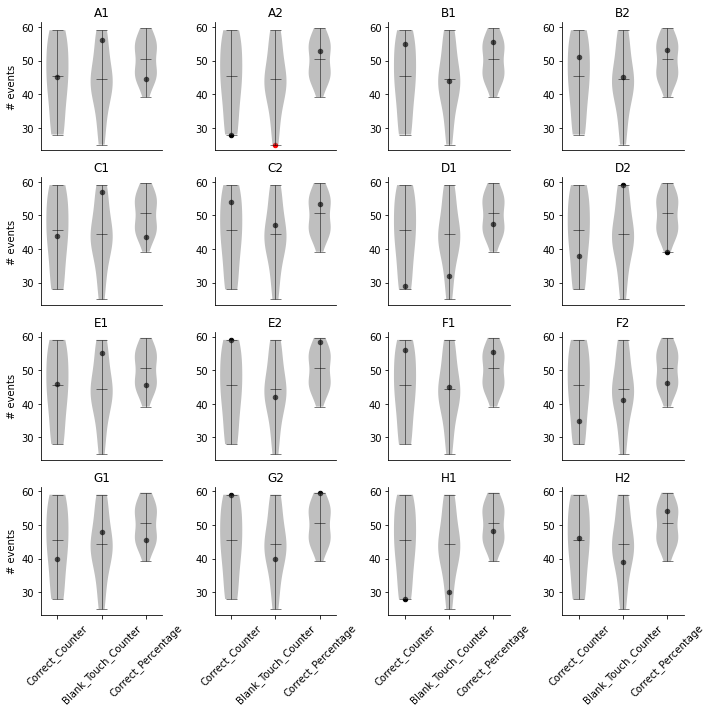

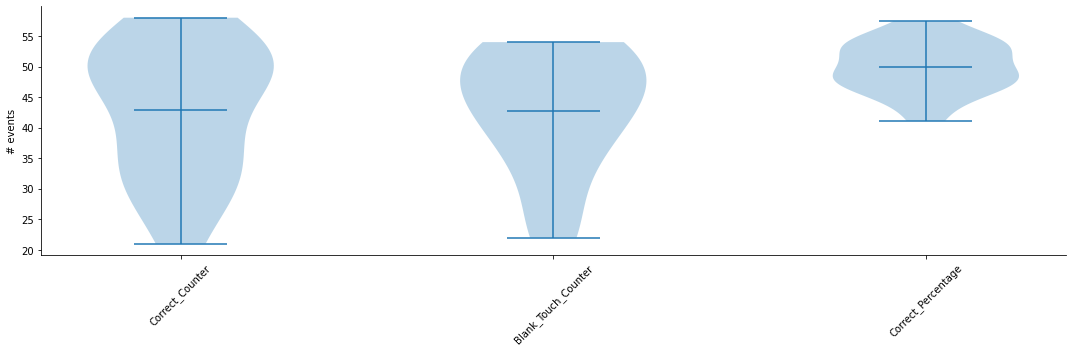

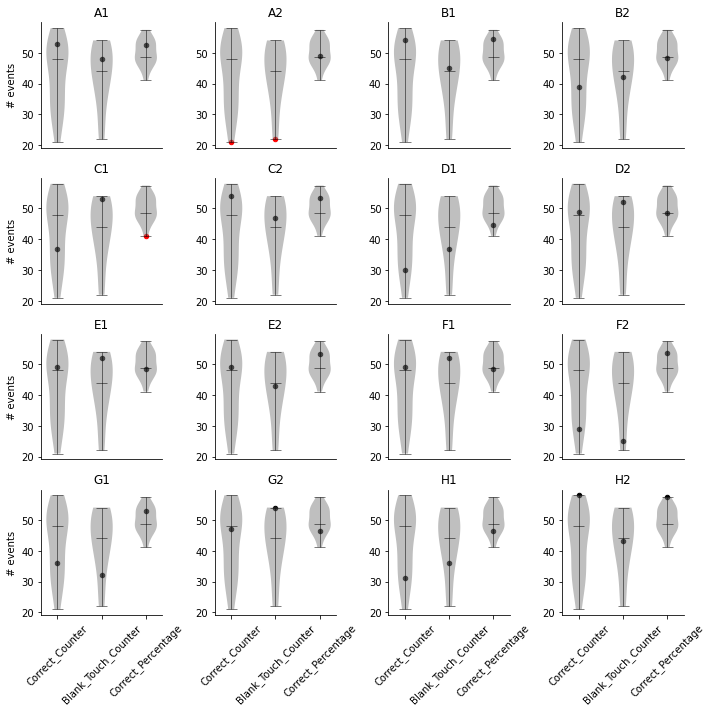

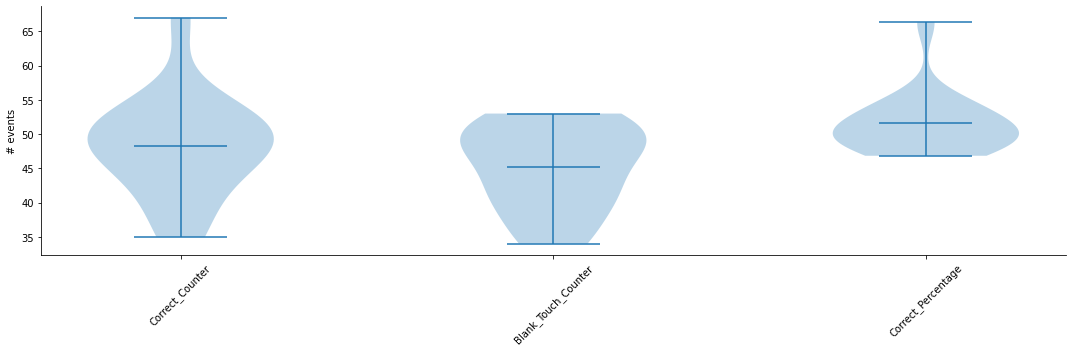

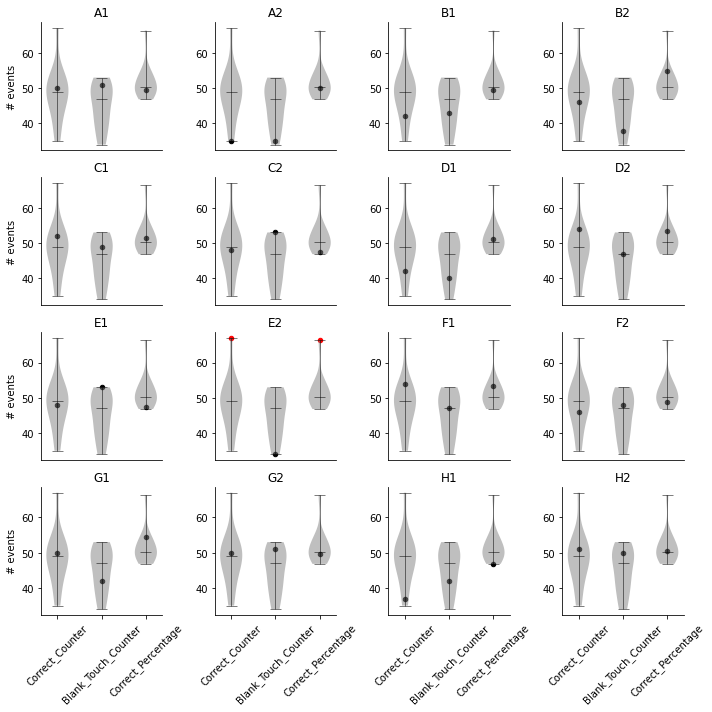

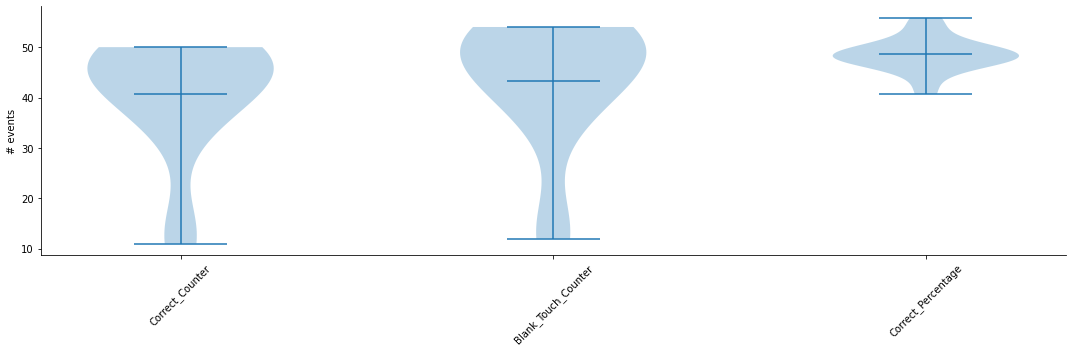

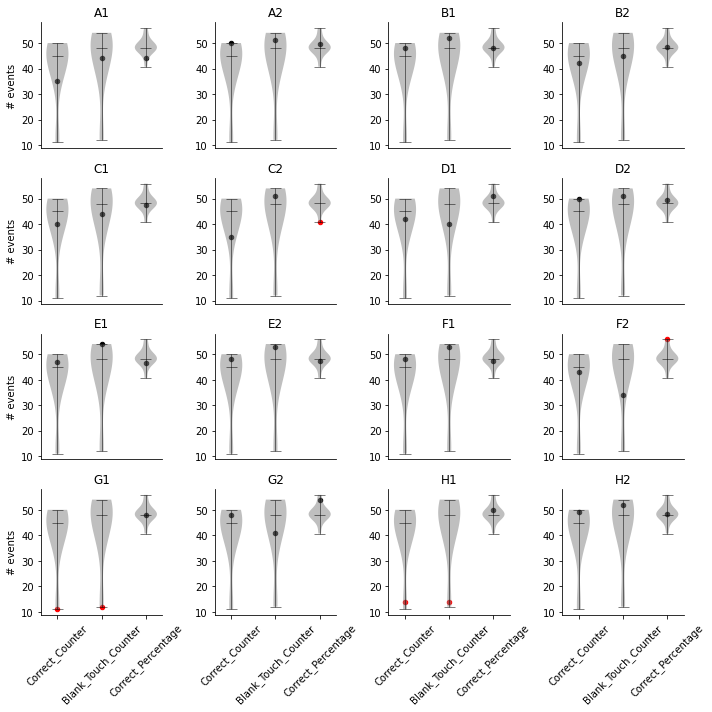

In [31]:
for date in ['05/02/24', '06/02/24', '07/02/24', '08/02/24', '09/02/24']:
    a = group_experiments.get_experiments_per_dates(date)
    mydate = date.replace('/', '')
    display_stats_group_experiments(a, output=f'stats_{mydate}.png')
    display_group_experiments(a, output=f'individuals_{mydate}.png')

R-squared: 0.038753


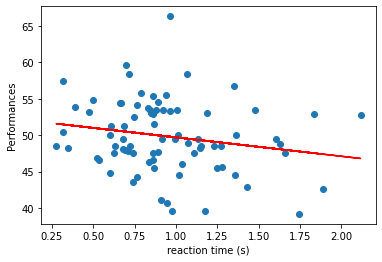

In [38]:
# Get initial weights
all_reaction_times = []
all_perfs = []
all_corrcoeffs = []
for type in ['Theta 1', 'Theta 2']:
    a = group_experiments.get_experiments_per_types(type)
    for e in a.experiments:
        tmp = e.get_reaction_times()
        all_corrcoeffs += [np.corrcoef(tmp, e.get_responses())[0, 1]]
        all_reaction_times += [tmp.mean()]
        all_perfs += [e.stats['Correct_Percentage']]
all_reaction_times = np.array(all_reaction_times)
all_perfs = np.array(all_perfs)

plt.xlabel('reaction time (s)')
plt.ylabel('Performances')
from scipy import stats
res = stats.linregress(all_reaction_times, all_perfs)
plt.plot(all_reaction_times, all_perfs, 'o', label='original data')
plt.plot(all_reaction_times, res.intercept + res.slope*all_reaction_times, 'r', label='fitted line')
print(f"R-squared: {res.rvalue**2:.6f}")

(array([ 5., 11., 13., 20., 13., 11.,  4.,  1.,  1.,  1.]),
 array([-0.27739051, -0.20459847, -0.13180643, -0.05901439,  0.01377765,
         0.08656969,  0.15936173,  0.23215377,  0.3049458 ,  0.37773784,
         0.45052988]),
 <BarContainer object of 10 artists>)

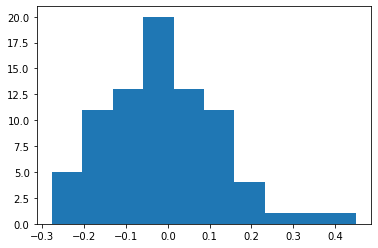

In [44]:
plt.hist(all_corrcoeffs, 10)

R-squared: 0.023923


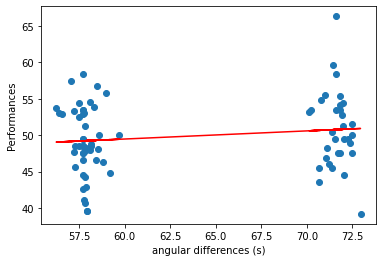

In [51]:
# Get initial weights
all_angular_differences = []
all_perfs = []
all_corrcoeffs = []
for type in ['Theta 1', 'Theta 2']:
    a = group_experiments.get_experiments_per_types(type)
    for e in a.experiments:
        tmp = e.get_angular_differences()
        tmp_2 = e.get_responses()
        if len(tmp) == len(tmp_2) + 1:
            tmp = tmp[:-1]
        all_corrcoeffs += [np.corrcoef(tmp, tmp_2)[0, 1]]
        all_angular_differences += [tmp.mean()]
        all_perfs += [e.stats['Correct_Percentage']]
all_angular_differences = np.array(all_angular_differences)
all_perfs = np.array(all_perfs)

plt.xlabel('angular differences (s)')
plt.ylabel('Performances')
from scipy import stats
res = stats.linregress(all_angular_differences, all_perfs)
plt.plot(all_angular_differences, all_perfs, 'o', label='original data')
plt.plot(all_angular_differences, res.intercept + res.slope*all_angular_differences, 'r', label='fitted line')
print(f"R-squared: {res.rvalue**2:.6f}")

(array([ 5.,  2.,  4., 12., 15., 18.,  9.,  8.,  4.,  3.]),
 array([-0.31831601, -0.2572907 , -0.19626539, -0.13524008, -0.07421477,
        -0.01318946,  0.04783586,  0.10886117,  0.16988648,  0.23091179,
         0.2919371 ]),
 <BarContainer object of 10 artists>)

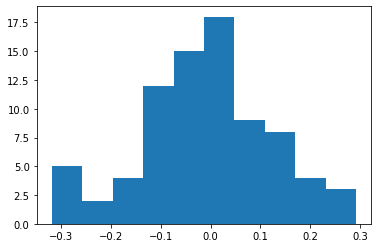

In [52]:
plt.hist(all_corrcoeffs, 10)